## Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set_style('whitegrid')

%matplotlib inline

## Get the Data
### Read data from USA_Housing csv file

In [2]:
df = pd.read_csv('USA_Housing.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Use pairplot() to find the most correlated feature with Price.**

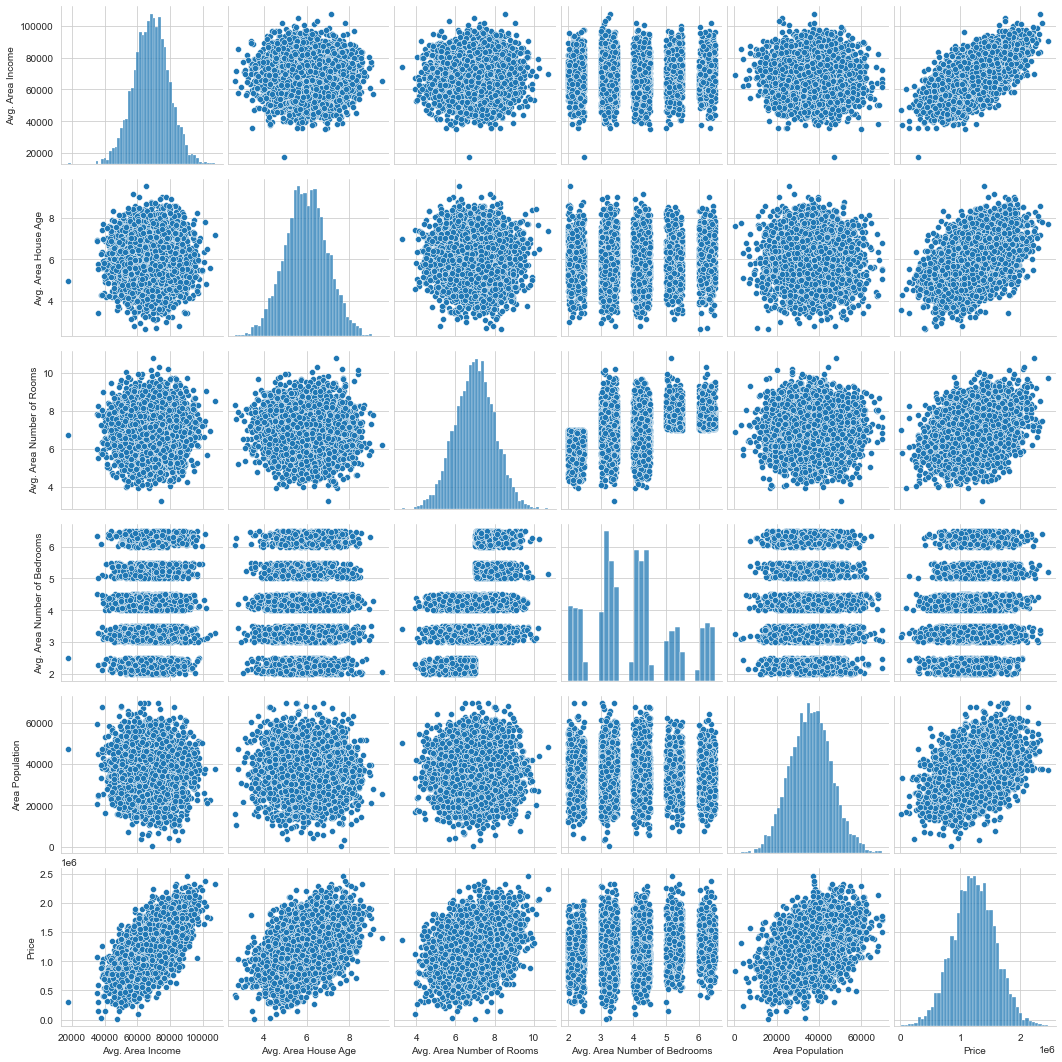

In [6]:
sns.pairplot(df)

**Use heatmap() to find the most correlated feature with Price.**

<AxesSubplot:>

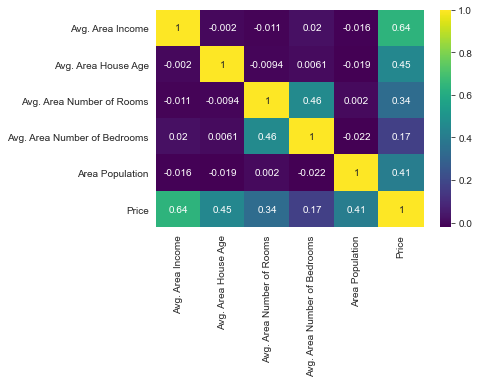

In [7]:
sns.heatmap(df.corr(), cmap='viridis', annot=True)

**Create a linear model plot (using seaborn's lmplot) of Avg. Area Income vs. Price of House. **

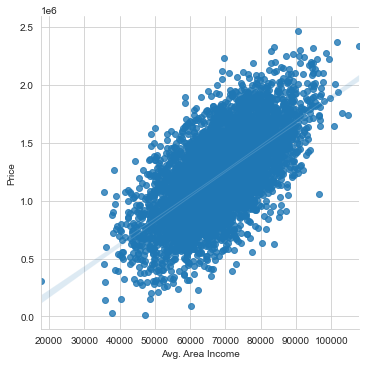

In [8]:
sns.lmplot(x='Avg. Area Income', y='Price', data=df)

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

**Split the data into training and testing sets**

In [10]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
        'Area Population']]

y = df['Price'].dropna()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

**Create an instance of a LinearRegression() model named lm.**

In [12]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [13]:
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [14]:
print("Coefficient: \n", lm.coef_)

Coefficient: 
 [2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


**Use lm.predict() to predict off the X_test set of the data.**

In [15]:
predictions = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

<AxesSubplot:xlabel='Price'>

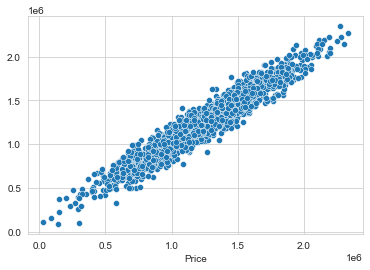

In [16]:
sns.scatterplot(x=y_test, y=predictions)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [17]:
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  82288.22251914945
MSE:  10460958907.208984
RMSE:  102278.829222909


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

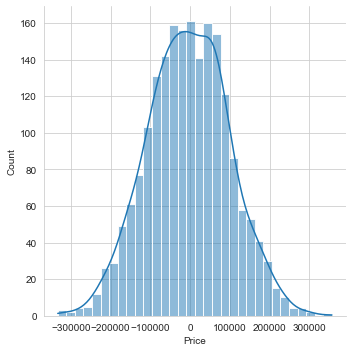

In [18]:
sns.displot((y_test-predictions), kde=True)

In [19]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420
